# Taller de Matemática Computacional 2021 - TUDAI/TUARI - FCEx - UNICEN

Autor: Dr. José Ignacio Orlando

# Unidad 5 - Probabilidad

## 1. ¿Por qué probabilidad en programación?

Vamos camino a una adopción más generalizada de la inteligencia artificial y el aprendizaje automático (machine learning), que se sustenta muchísimo en conceptos de probabilidades y estadística!

Las probabilidades son la base para avanzar hacia la estadística, y luego poder hacer análisis sistemático a partir de datos (muy útil para confeccionar dashboards y asistentes para toma de decisiones).

Se usan mucho para poder simular escenarios aleatorios (útiles por ejemplo para casos de test, o en la industria de videojuegos!)


## 2. El motor de simulación por Montecarlo

El método de simulación por Montecarlo es una técnica estadística que nos permite estimar el comportamiento de un cierto sistema o fenómenos generando múltiples muestras aleatorias. El método se llama así por el famoso casino de Montecarlo en Mónaco, donde obviamente tienen lugar muchos juegos de azar.

La idea principal del motor es que, mediante una función de muestreo, podamos repetir experimentos aleatorios múltiples veces, registrar sus resultados, y obtener a partir de ellos una estimación estadística de su comportamiento. Pueden pensarlo como una manera computacional de reproducir algo que haríamos en la vida real. Por ejemplo, si queremos conocer cuál es la probabilidad de que nos toque cara o ceca al lanzar una moneda al aire, podemos lanzar la moneda un número enorme de veces (10.000, por ejemplo), registrar los resultados de cada uno de esos experimentos (es decir, contar el total de casos favorables para los eventos aleatorios $A : $ que me toque cara, y $B :" que me toque ceca, y luego dividir por el total de pruebas que hicimos.

A continuación vamos a tratar de modelar este cálculo de probabilidades usando el motor de Montecarlo.

Obviamente el primer elemento que necesitamos es la función de muestreo. En este caso, como queremos arrojar una moneda al aire, haremos una función ```arrojar_moneda()``` que nos va a devolver cara o ceca de forma aleatoria. Las probabilidades que vamos a usar acá para arrojar la moneda son clave, porque son las que van a determinar con qué frecuencia nos va a tocar una u otra cosa.

Esto puede confundirlos un poco (al menos a mí me pasó durante mucho tiempo): ¿para qué me sirve un motor que calcula probabilidades si la función de muestreo que voy a usar necesita conocer las probabilidades? La respuesta es que no se usa exactamente para esto. El motor de Montecarlo nos permite medir otros escenarios mucho más interesantes. Pero esto es una buena excusa para aprender a usarlo.

Volviendo al tema, entonces. Hagamos la función de muestreo. Para ello vamos a definir una variable ```prob_acum``` con las probabilidades acumuladas de sacar cara o ceca. Es decir, $0.5$ es la probabilidad de sacar cara, y la probabilidad acumulada de sacar cara o ceca es $0.5 + 0.5 = 1$. Luego vamos a sortear un número aleatorio entre 0 y 1 usando la función ```random()```, y usar ese número para elegir si nos tocó cara o ceca: es decir, si el número aleatorio es menor a 0.5, puedo asumir que es cara; si no, sigo buscando (pero como solamente tengo 2 resultados posibles, voy a caer en ceca).

Veamos cómo queda programada:

In [2]:
from random import random

def arrojar_moneda():
  # resultados posibles del experimento
  resultado = ["cara", "ceca"]
  # arreglo de probabilidades acumuladas
  prob_acum = [0.5, 1]
  # sorteo un valor entre 0 y 1
  r = random()
  # itero para ver si es cara o seca
  for i in range(len(prob_acum)):
    # si el valor aleatorio que sorteamos es menor al de esta posición
    # en el arreglo de probabilidades acumuladas, entonces asumo que
    # me tocó el valor asociado a esa posición; si no, continúo recorriendo
    # el arregl ode probabilidades
    if r < prob_acum[i]:
      return resultado[i]


Probemos ahora qué pasa si hacemos, por ejemplo 20 sorteos de caras y secas:

In [3]:
for i in range(20):
  print(arrojar_moneda())

ceca
cara
cara
cara
ceca
cara
cara
cara
ceca
cara
ceca
cara
cara
cara
cara
cara
cara
cara
ceca
ceca


Como verán, a veces obtenemos cara y otras veces obtenemos ceca. Si quisiéramos, podríamos contar cuántas veces aparecieron caras y cecas, y aproximar la probabilidad así. Veamos cómo:

In [12]:
# determinamos el nro total de pruebas que queremos hacer
nro_pruebas = 100
# usamos un diccionario para contar caras y cecas
contador_ocurrencias = {"cara": 0, "ceca": 0}

# corremos todas las pruebas
for i in range(nro_pruebas):
  # lanzamos la moneda
  resultado = arrojar_moneda()
  # y según el resultado que me haya tocado, acumulo
  contador_ocurrencias[resultado] = contador_ocurrencias[resultado] + 1

# imprimo los resultados
print("Ocurrencias:")
print(contador_ocurrencias)
# y calculo las probabilidades dividiendo cada una
probabilidades = dict()
for k in contador_ocurrencias.keys():
  probabilidades[k] = contador_ocurrencias[k] / nro_pruebas
# y ya que estoy las imprimo
print("Probabilidades:")
print(probabilidades)

Ocurrencias:
{'cara': 48, 'ceca': 52}
Probabilidades:
{'cara': 0.48, 'ceca': 0.52}


Si se fijan, las probabilidades que obtuvimos cambian con distintas ejecuciones, pero siempre oscilan en torno a valores más o menos correctos.

Si repetimos esto un mayor número de veces, no solamente 100, las estimaciones deberian aproximarse más y más al valor esperado. Hagamos algo, entonces: repitámoslo unas 10.000 veces, y grafiquemos cómo cambian las probabilidades según el número de prubeas. Para eso vamos a llevar dos arreglos de 10.000 posiciones cada uno, uno para las diferentes probabilidades que vayamos calculando para las caras, y otro igual para las cecas.

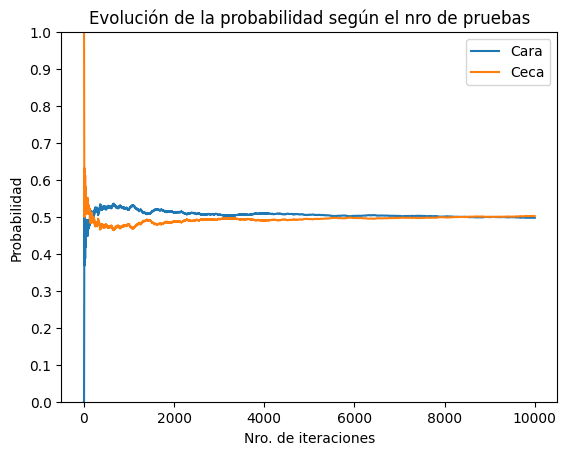

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# inicializo el nro de pruebas total
nro_pruebas = 10000
# inicializo un diccionario con dos vectores, uno para todas las probabilidades
# de cara y otro para las probabilidades de ceca
probabilidades = {"cara": np.zeros(nro_pruebas), "ceca": np.zeros(nro_pruebas)}
# inicializo el contador de ocurrencias (solamente preciso uno)
ocurrencias = {"cara": 0, "ceca": 0}

# itero hasta completar el nro de pruebas
for i in range(nro_pruebas):

  # hago una prueba
  resultado = arrojar_moneda()
  # y cuento el resultado
  ocurrencias[resultado] = ocurrencias[resultado] + 1

  # ahora calculo la probabilidad actual para cada uno de mis resultados,
  # en función de las ocurrencias que fui contando y el nro de pruebas que
  # voy haciendo (i+1, porque arranca en 0!)
  for k in ocurrencias.keys():
    probabilidades[k][i] = ocurrencias[k] / (i+1)


# y con esto generamos la gráfica
plt.title("Evolución de la probabilidad según el nro de pruebas")
plt.plot(probabilidades["cara"])
plt.plot(probabilidades["ceca"])
plt.legend(["Cara", "Ceca"])
plt.xlabel("Nro. de iteraciones")
plt.ylabel("Probabilidad")
plt.ylim([0.0, 1.0])
plt.yticks(np.arange(0.0, 1.1, 0.1))
plt.show()



Como pueden ver, al principio las probabilidades están en una mal, y no se parecen en nada a las que calculamos analíticamente. Pero luego, a medida que el número de pruebas se va incrementando, los resultados empiezan a parecerse más y más, hasta llegar a un punto en el que los cambios que ocurren son muy pequeños.

Bueno, este es el germen detrás de la simulación Montecarlo: sabemos que si repetimos el experimento muchas veces, los resultados van a **converger**: es decir, la diferencia entre el resultado que obtuve con la prueba anterior y el resultado que obtuve en esta nueva prueba van a ser muy pero muy parecidos, difiriendo en un número muy pequeño, al que llamaremos épsilon ($\epsilon$).

Ahora que tenemos este concepto, armemos entonces un motor de simulación por Montecarlo. Los elementos que necesitamos son:
* Una función que haga el experimento aleatorio.
* Un criterio de parada que corte el ciclo de experimentos cuando se llega a la convergencia.
* Un bucle que repita los experimentos hasta que se cumpla el criterio de parada.

Hagamos la función de convergencia primero, para un único valor de probabilidad:

In [14]:
def converge(prob_ant, prob_act, epsilon=1e-10):
  # tomo el valor absoluto entre la probabilidad actual y la probabilidad anterior
  # y me fijo si es menor a epsilon
  if abs(prob_act - prob_ant) < epsilon:
    return True
  else:
    return False

La función anterior toma el valor absoluto entre la probabilidad anterior y la probabilidad actual, y si ambas difieren en menos de un cierto valor dado ```epsilon```, devuelve ```True```. A esta función podemos usarla dentro de un bucle ```while```, entonces, que itere mientras la función no converja.

Ahora bien, tengamos en cuenta que por azar puede ocurrir que en dos tiradas nos toque lo mismo, y que por ende las probabilidades anteriores y actuales al principio nos den iguales y por ende menores a $\epsilon$, y la función converja. Esto se conoce como el problema de convergencia prematura, y es muy fácil de sortear: basta que pongamos un número mínimo de pruebas, y que iteremos mientras el número de pruebas hechas sea menor a $\epsilon$ o las probabilidades no converjan. Y listo!

Joya, entonces, hagamos un motor Montecarlo que nos calcule la probabilidad de sacar una cara al arrojar una moneda:

In [17]:
# inicializo el valor de probabilidad anterior
prob_ant = 1.0
# y el de probabilidad actual (y trato de poner valores distintos!)
prob_act = 0.0
# pongo un valor de epsilon
epsilon = 1e-7
# inicializo el contador de exitos en 0
exitos = 0
# el contador de pruebas en 0 también
nro_pruebas = 0
# y establezco un número mínimo de pruebas para evitar la convergencia prematura
nro_minimo_pruebas = 2000

while (nro_pruebas < nro_minimo_pruebas) or not converge(prob_ant, prob_act, epsilon):

  resultado = arrojar_moneda()
  nro_pruebas = nro_pruebas + 1

  if resultado == "cara":
    exitos = exitos + 1

  prob_ant = prob_act
  prob_act = exitos / nro_pruebas

  if (nro_pruebas % 1000) == 0:
    print("Voy haciendo {} pruebas".format(nro_pruebas))

print("========")
print("Convergí!")
print("Hice {} pruebas".format(nro_pruebas))
print("y la probabilidad me dio {:.4f}".format(prob_act))


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Voy haciendo 3000 pruebas
Voy haciendo 4000 pruebas
Voy haciendo 5000 pruebas
Voy haciendo 6000 pruebas
Voy haciendo 7000 pruebas
Voy haciendo 8000 pruebas
Voy haciendo 9000 pruebas
Voy haciendo 10000 pruebas
Voy haciendo 11000 pruebas
Voy haciendo 12000 pruebas
Voy haciendo 13000 pruebas
Voy haciendo 14000 pruebas
Voy haciendo 15000 pruebas
Voy haciendo 16000 pruebas
Voy haciendo 17000 pruebas
Voy haciendo 18000 pruebas
Voy haciendo 19000 pruebas
Voy haciendo 20000 pruebas
Voy haciendo 21000 pruebas
Voy haciendo 22000 pruebas
Voy haciendo 23000 pruebas
Voy haciendo 24000 pruebas
Voy haciendo 25000 pruebas
Voy haciendo 26000 pruebas
Voy haciendo 27000 pruebas
Voy haciendo 28000 pruebas
Voy haciendo 29000 pruebas
Voy haciendo 30000 pruebas
Voy haciendo 31000 pruebas
Voy haciendo 32000 pruebas
Voy haciendo 33000 pruebas
Voy haciendo 34000 pruebas
Voy haciendo 35000 pruebas
Voy haciendo 36000 pruebas
Voy haciendo 37000 pru

Listo! Tenemos nuestro primer motor de Montecarlo hecho. Si se fijan, no es tan difícil: es repetir hasta converger, nada más que eso :)

¿Se animan a probar cómo influyen en los resultados de la probabilidad estos parámetros?
* Número mínimo de pruebas.
* Valor de epsilon.

## 4. Ahora te toca a vos!

Ahora ya sabés lo suficiente de Python como para:
* Sortear números aleatorios
* Usar esos números para simular escenarios
* Programar un motor Montecarlo completo

Por eso te invitamos a que resuelvas vos mismo/a este pequeño problema.

Queremos que escribas el motor Montecarlo para calcular la probabilidad de que al tirar la moneda 3 veces, te toquen las 3 veces cara. Pista: pensá en cuántas veces por iteración necesitás hacer el experimento, y cómo se cuentan los casos de éxito ;)

Y, ya que estamos... Éxitos!
